In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [65]:
def spatial_features_2d(coords,masks):
    if len(coords.shape) == 2:coords = coords.unsqueeze(0)
    if len(masks.shape) == 2: masks = masks#.unsqueeze(-1)
    coords.repeat(masks.shape[0],1,1)
    
    coords = coords[masks > 0.5]
    means = torch.mean(coords, dim = 0)
    moments = 0
    return means, moments


tensor([0.1906, 0.0977])


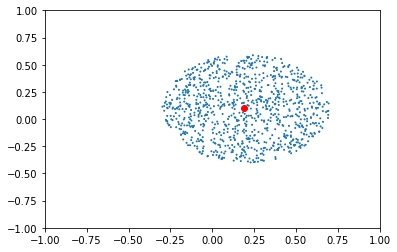

In [73]:

H, W = 64,64
num_pts = 5000
x = torch.linspace(-1,1,H)
y = torch.linspace(-1,1,W)
coords = torch.meshgrid(x,y)

sg = 2 * (torch.rand([num_pts,2]) - 0.5 )

def plot_circ(pts,cx,cy,w,h, radius = 0.5):
    dist = torch.sqrt(((pts[:,0] - cx) / w)**2 + ((pts[:,1] - cy)/h) ** 2)
    return (dist < radius).int()

colors = plot_circ(sg,0.2,0.1,1.0,1.0, 0.5)

colors = colors.unsqueeze(0)

mean_stats, moments = spatial_features_2d(sg,colors)

print(mean_stats)

ax = plt.subplot(111)
ax.scatter(sg[:,0], sg[:,1], colors)
ax.scatter(mean_stats[0],mean_stats[1], color = "red")
ax.set_xlim(-1.,1.)
ax.set_ylim(-1.,1.)
plt.show()